In [4]:
cd /home/zhangh/medchallenge/Testing/TestingColab/ISR

/home/zhangh/medchallenge/Testing/TestingColab/ISR


In [5]:
!wget http://images.math.cnrs.fr/IMG/png/section8-image.png
!mkdir -p data/input/test_images
!mv *.png data/input/test_images

--2024-11-06 11:30:42--  http://images.math.cnrs.fr/IMG/png/section8-image.png
Resolving images.math.cnrs.fr (images.math.cnrs.fr)... 129.88.207.22
Connecting to images.math.cnrs.fr (images.math.cnrs.fr)|129.88.207.22|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://images.math.cnrs.fr/IMG/png/section8-image.png [following]
--2024-11-06 11:30:42--  https://images.math.cnrs.fr/IMG/png/section8-image.png
Connecting to images.math.cnrs.fr (images.math.cnrs.fr)|129.88.207.22|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-06 11:30:44 ERROR 404: Not Found.

mv: cannot stat '*.png': No such file or directory


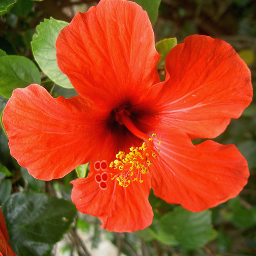

In [6]:
import numpy as np
from PIL import Image

img = Image.open('data/input/test_images/section8-image.png')
img

In [8]:
# Uncomment if using local repo
# import sys
# sys.path.append('..')
from ISR.models import RDN, RRDN

# model = RDN(weights='noise-cancel')
model = RRDN(weights='gans')
# model = RDN(weights='psnr-small')
# model = RDN(weights='psnr-large')

ModuleNotFoundError: No module named 'ISR'

In [9]:

!rm -rf pretrained_models
!wget https://github.com/Saafke/EDSR_Tensorflow/raw/master/models/EDSR_x4.pb -P pretrained_models -q
!wget https://github.com/fannymonori/TF-ESPCN/raw/master/export/ESPCN_x4.pb -P pretrained_models -q
!wget https://github.com/Saafke/FSRCNN_Tensorflow/raw/master/models/FSRCNN_x4.pb -P pretrained_models -q
!wget https://github.com/fannymonori/TF-LapSRN/raw/master/export/LapSRN_x4.pb -P pretrained_models -q

In [16]:

!pip install opencv-contrib-python --upgrade

  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 29.8 kB/s eta 0:00:0000:0100:46


In [ ]:
import os
dir_dataset =  '/home/zhangh/medchallenge/Testing/TestingColab/dataset/TinyNTUT/train'
files_img = [os.path.join(dir_dataset, x) for x in os.listdir(dir_dataset)]

len(files_img), files_img[0: ]

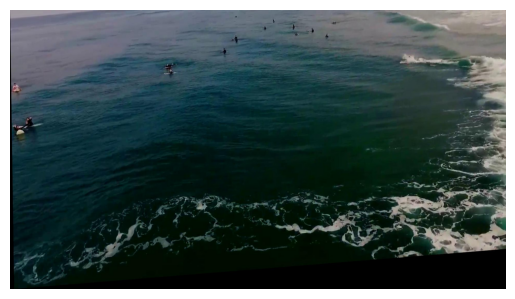

In [5]:
import cv2
import matplotlib.pyplot as plt

# Make sure files_img is a list of image file paths
img = cv2.imread(files_img[10], cv2.IMREAD_UNCHANGED)

# Convert the color format from BGR (OpenCV default) to RGB (matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axis
plt.show()


In [6]:
import os
dir_pretrained_models = 'pretrained_models'
os.listdir(dir_pretrained_models)

['FSRCNN_x4.pb', 'LapSRN_x4.pb', 'EDSR_x4.pb', 'ESPCN_x4.pb']

In [8]:
def get_upscaled_images(img, filemodel_filepath, modelname, scale):
    model_pretrained = cv2.dnn_superres.DnnSuperResImpl_create()
    print("Reading model file {}".format(filemodel_filepath))
  
    # setting up the model initialization
    model_pretrained.readModel(filemodel_filepath)
    model_pretrained.setModel(modelname, scale)
  
    # prediction or upscaling
    img_upscaled = model_pretrained.upsample(img)
    return img_upscaled

# Assuming files_img[0] is the image file path
img = cv2.imread(files_img[10], cv2.IMREAD_UNCHANGED)
print(img.shape)  # Check original image shape

# Apply super-resolution to the original image
img_upscaled1 = get_upscaled_images(img, "pretrained_models/EDSR_x4.pb", "edsr", 4)
img_upscaled2 = get_upscaled_images(img, "pretrained_models/ESPCN_x4.pb", "espcn", 4)
img_upscaled3 = get_upscaled_images(img, "pretrained_models/FSRCNN_x4.pb", "fsrcnn", 4)
img_upscaled4 = get_upscaled_images(img, "pretrained_models/LapSRN_x4.pb", "lapsrn", 4)

print(img_upscaled1.shape, img_upscaled2.shape, img_upscaled3.shape, img_upscaled4.shape)


(1080, 1920, 3)
Reading model file pretrained_models/EDSR_x4.pb


Reading model file pretrained_models/ESPCN_x4.pb
Reading model file pretrained_models/FSRCNN_x4.pb
Reading model file pretrained_models/LapSRN_x4.pb
(4320, 7680, 3) (4320, 7680, 3) (4320, 7680, 3) (4320, 7680, 3)


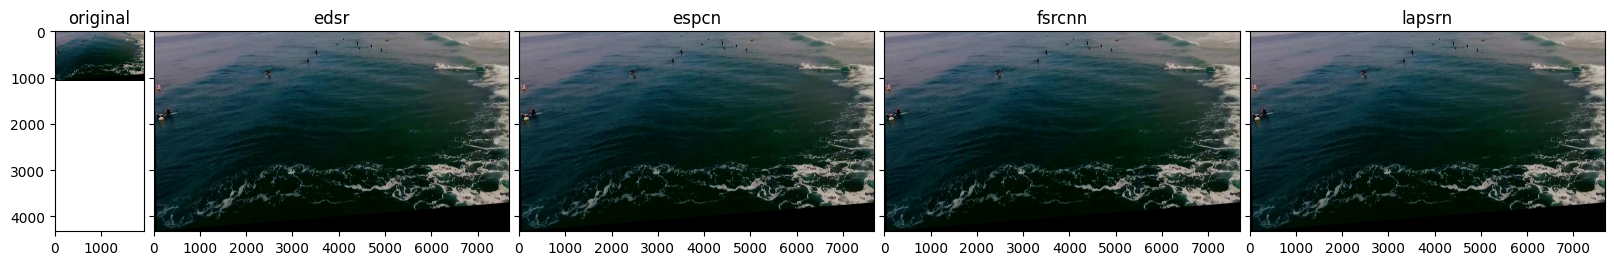

In [11]:
# from mpl_toolkits.axes_grid1 import ImageGrid

def plot_images(images, titles):
    fig = plt.figure(figsize=(20., 8.))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, len(images)), axes_pad=0.1)

    i = 0
    for ax, img in zip(grid, images):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(titles[i])
        i += 1
    plt.show()

titles = ["original", "edsr", "espcn", "fsrcnn", "lapsrn"]
images = [img, img_upscaled1, img_upscaled2, img_upscaled3, img_upscaled4]
plot_images(images, titles)